New weights after 1 iteration:
 Bias = 1.9522
 W1 = 0.4396
 W2 = -0.7511


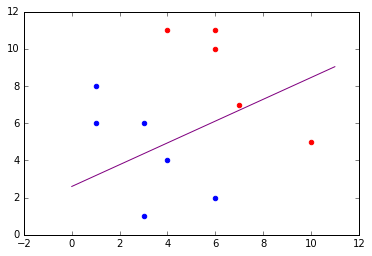

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# These are helper functions for plotting.
def plot_sep_line(w, n):
    
    domain = np.linspace(0,n)
    image  = list( map( lambda x : -(w[1]*x + w[0])/w[2] , domain ) )
    plt.plot(domain, image, color='purple')
    
def plot_result(w):
    plot_sep_line(w, N)
    _ = plt.scatter(x=X1[:6], y=X2[:6], color='b')
    _ = plt.scatter(x=X1[6:], y=X2[6:], color='r')

def plot_errors(errors):
	plt.plot(range(0,len(errors)), errors, label='Error' )   
	plt.legend()

# These are the Activation Functions.

def sigmoid(x):
	return 2*1/(1+np.exp(-x)) - 1

def step(x):
    return np.where( x > 0, 1, -1 )

def linear (x):
    return x

# Calculate the error. (Difference between target and prediction)
def err(w, x, z):
    net = activate( np.dot(x,w) )
    return z - net

# Initial weights (+ bias)
W  = [2, 0.8, -0.5]

# Input Training Set
X1 = [ 1, 6, 3, 4, 3, 1,     6,   7,  6, 10,  4 ]
X2 = [ 8, 2, 6, 4, 1, 6,     10,  7, 11,  5, 11 ]
Z  = [ 1, 1, 1, 1, 1, 1,     -1, -1, -1, -1, -1 ]
N  = len(X1)
X0 = np.ones(N)

X  = np.array( [X0, X1, X2] ).T

# Initial plotting of data.
#plot_result(W)

# Pass the activation Function
# Options: linear, step, sigmoid.
activate = linear

# Assign the given eta.
ETA = 1/50
W_copy  = W
M   = 1

for i in range(0,M):
    update_avg  = 0
    
    for x,z in zip(X,Z):
        e = err(W_copy,x,z)
        update_avg  += ETA * e * x / N
        
    W_copy += update_avg      # Update the weights

print('New weights after 1 iteration:\n Bias = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W_copy ) )
plot_result(W_copy)

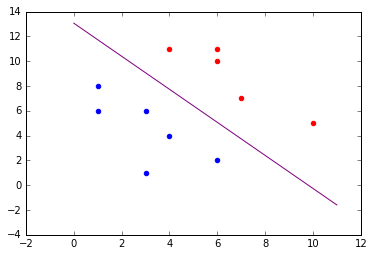

In [2]:
# Training until first correct classification. 
W_copy_final  = W
M   = 1000

for i in range(0,M):
    update_avg  = 0
    error = 0
    
    for x,z in zip(X,Z):
        e= err(W_copy_final,x,z)
        error +=e ** 2
        update_avg  += ETA * e * x / N  # As derived by the Delta rule.
        if error== 0 : break
        
    W_copy_final += update_avg      # Update the weights

plot_result(W_copy_final)